In [2]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np



In [3]:
# A) Loading and Pre-processing the Image Data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshaping data to fit model (adding the channel dimension for grayscale images)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Converting pixel values to float and normalizing
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

print("Shape of Training data:", x_train.shape)



Shape of Training data: (60000, 28, 28, 1)


In [4]:
# B) Defining the Model's Architecture
model = Sequential()
model.add(Conv2D(28, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(200, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(10, activation="softmax"))

# Displaying the model summary
model.summary()



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 28)     │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 28)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4732)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 200)            │       946,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 948,890 (3.62 MB)

 Trainable params: 948,890 (3.62 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# C) Training the Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=2)



Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 19ms/step - accuracy: 0.8945 - loss: 0.3399
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 19ms/step - accuracy: 0.9802 - loss: 0.0656


In [6]:
# D) Evaluating the Model
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {:.3f}".format(test_loss))
print("Test Accuracy: {:.3f}".format(test_acc))



313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9796 - loss: 0.0566
Test Loss: 0.045
Test Accuracy: 0.985


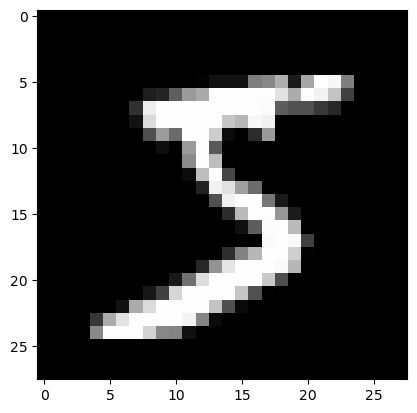

In [7]:
# E) Displaying an Image from the Dataset
image_index = 0  # Change this to view different images
image = x_train[image_index]
plt.imshow(np.squeeze(image), cmap="gray")
plt.show()



In [8]:
# F) Predicting the Class of the Image
image = image.reshape(1, image.shape[0], image.shape[1], image.shape[2])
prediction = model.predict(image)
print("Predicted class:", np.argmax(prediction))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
Predicted class: 5


In [ ]:
Build the Image classification model by dividing the model into following 4 stages:
a. Loading and preprocessing the image data
b. Defining the model’s architecture
c. Training the model
d. Estimating the model’s performance